# Car Price Prediction

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression as lm

In [205]:
cars=pd.read_csv(r"C:\Users\Sumanth_Kavety\Downloads\CarPrice_Assignment.csv")
cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [206]:
#creating a copy of original.
carsdata=cars.copy()
carsdata

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [207]:
cars.shape

(205, 26)

In [208]:
cars.sample(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
20,21,0,chevrolet vega 2300,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6575.0
114,115,0,peugeot 505s turbo diesel,diesel,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.70,3.52,21.0,95,4150,25,25,17075.0
189,190,3,vw dasher,gas,std,two,convertible,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,11595.0


In [209]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [210]:
cars.tail(12)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
193,194,0,volkswagen dasher,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290.0
194,195,-2,volvo 145e (sw),gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940.0
195,196,-1,volvo 144ea,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.0
196,197,-2,volvo 244dl,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0
197,198,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0
198,199,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0
199,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [211]:
#changing the index to car_ID from S.no

pd.read_csv(r"C:\Users\Sumanth_Kavety\Downloads\CarPrice_Assignment.csv",index_col=["car_ID"])

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [212]:
cars.info()

#info() - Gives the details about Data type, column and non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [213]:
#Gives us the statstical details of numerical data

cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [214]:
#Gives us the statstical details of categorical data

cars.describe(include="object")

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [215]:
cars.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [216]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## Univariate Analysis (Categorical data)

In [217]:
#List of type of car bodies:

cars["carbody"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [218]:
#Total count of car bodies:

cars["carbody"].nunique()

5

In [219]:
#Count of each distinct value:

cars["carbody"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [220]:
#Calculating the percentage of each carbody type:

cars["carbody"].value_counts(normalize=True)*100

sedan          46.829268
hatchback      34.146341
wagon          12.195122
hardtop         3.902439
convertible     2.926829
Name: carbody, dtype: float64

<Axes: ylabel='carbody'>

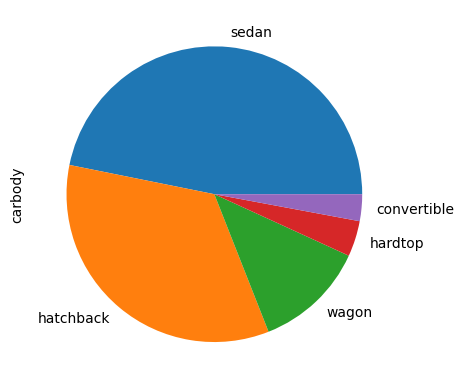

In [221]:
#Pie chart representation of carbodies

cars["carbody"].value_counts().plot(kind="pie")

<Axes: >

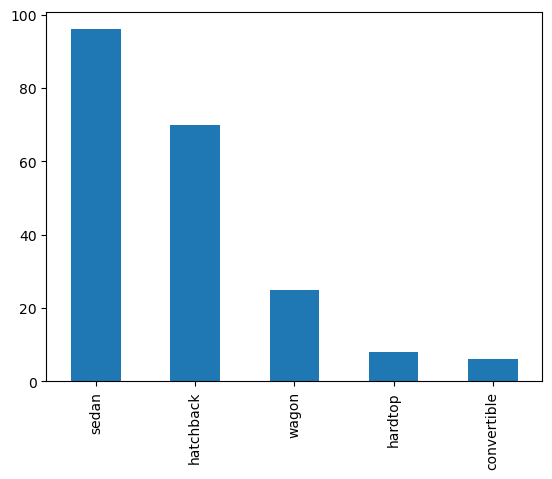

In [222]:
#Bar chart representation of carbodies

cars["carbody"].value_counts().plot(kind="bar")

<Axes: xlabel='drivewheel', ylabel='count'>

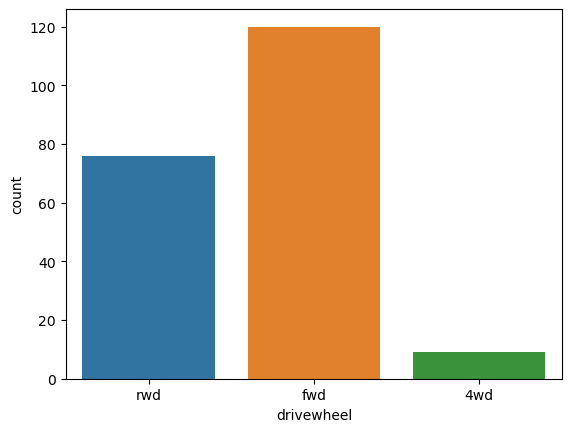

In [223]:
sns.countplot(x = cars["drivewheel"])

## Univariate Analysis (Numerical Data)

C:\Users\Sumanth_Kavety\AppData\Local\Temp\ipykernel_22396\3387499045.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars["enginesize"])


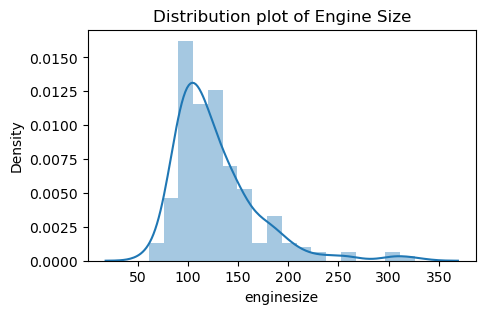

In [224]:
#Distribution plot for the enginesize column
plt.figure(figsize=(5,3))
sns.distplot(cars["enginesize"])
plt.title("Distribution plot of Engine Size")
plt.show()

C:\Users\Sumanth_Kavety\AppData\Local\Temp\ipykernel_22396\2223703823.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['stroke'])


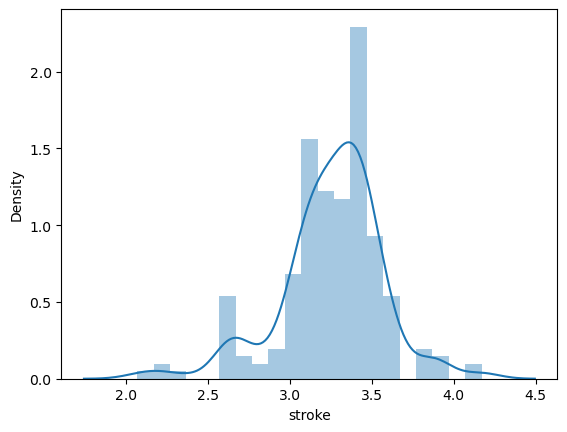

In [225]:
sns.distplot(cars['stroke'])
plt.show()

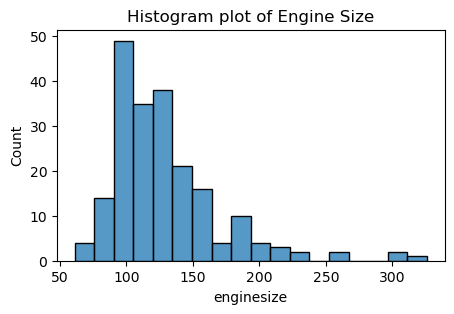

In [226]:
#Histogram plot for the enginesize column

plt.figure(figsize=(5,3))
sns.histplot(cars["enginesize"])
plt.title("Histogram plot of Engine Size")
plt.show()

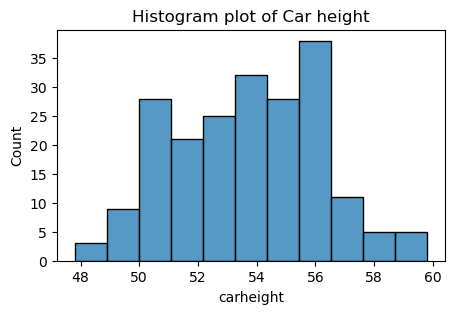

In [227]:
plt.figure(figsize=(5,3))
sns.histplot(cars["carheight"])
plt.title("Histogram plot of Car height")
plt.show()

<Axes: >

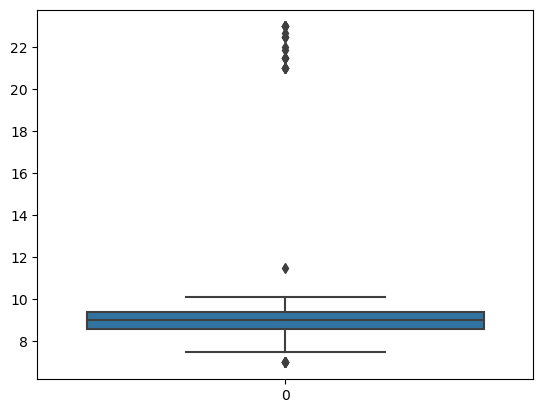

In [228]:
sns.boxplot(cars["compressionratio"])

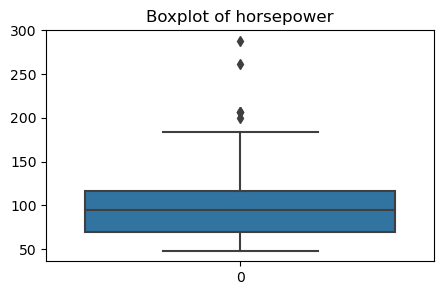

In [229]:
plt.figure(figsize=(5,3))
sns.boxplot(cars["horsepower"])
plt.title("Boxplot of horsepower")
plt.show()

In [230]:
#Storing all the numerical data in one variable

cars_numeric = cars.select_dtypes(include=["float64","int64"])
cars_numeric

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [231]:
# dropping symboling and car_ID 

cars_numeric = cars_numeric.drop(['symboling', 'car_ID'], axis=1)
cars_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [232]:
cars_numeric.shape

(205, 14)

## Bivariate Analysis (Categorical Variable)

In [233]:
#How many Sedan car people using gas as fuel?
pd.crosstab(cars["carbody"],cars["fueltype"])

Ans: 81

In [234]:
#To get the total count

pd.crosstab(cars["carbody"],cars["fueltype"],margins=True)

fueltype,diesel,gas,All
carbody,,,
convertible,0,6,6
hardtop,1,7,8
hatchback,1,69,70
sedan,15,81,96
wagon,3,22,25
All,20,185,205


In [235]:
#To calculate the % of carbody VS Fuel
pd.crosstab(cars["carbody"],cars["fueltype"],normalize=True)*100

fueltype,diesel,gas
carbody,,
convertible,0.000000,2.926829
hardtop,0.487805,3.414634
hatchback,0.487805,33.658537
sedan,7.317073,39.512195
wagon,1.463415,10.731707


<Figure size 500x300 with 0 Axes>

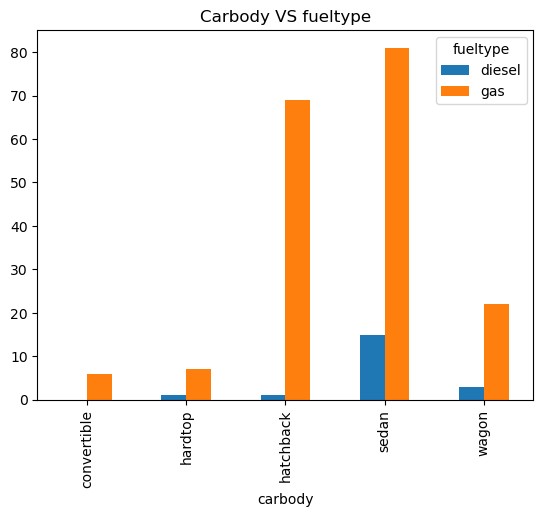

In [236]:
plt.figure(figsize=(5,3))
pd.crosstab(cars["carbody"],cars["fueltype"]).plot(kind="bar")
plt.title("Carbody VS fueltype")
plt.show()

## Bivariate Analysis (Numerical Variable)

In [237]:
x= cars_numeric.corr()
x

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


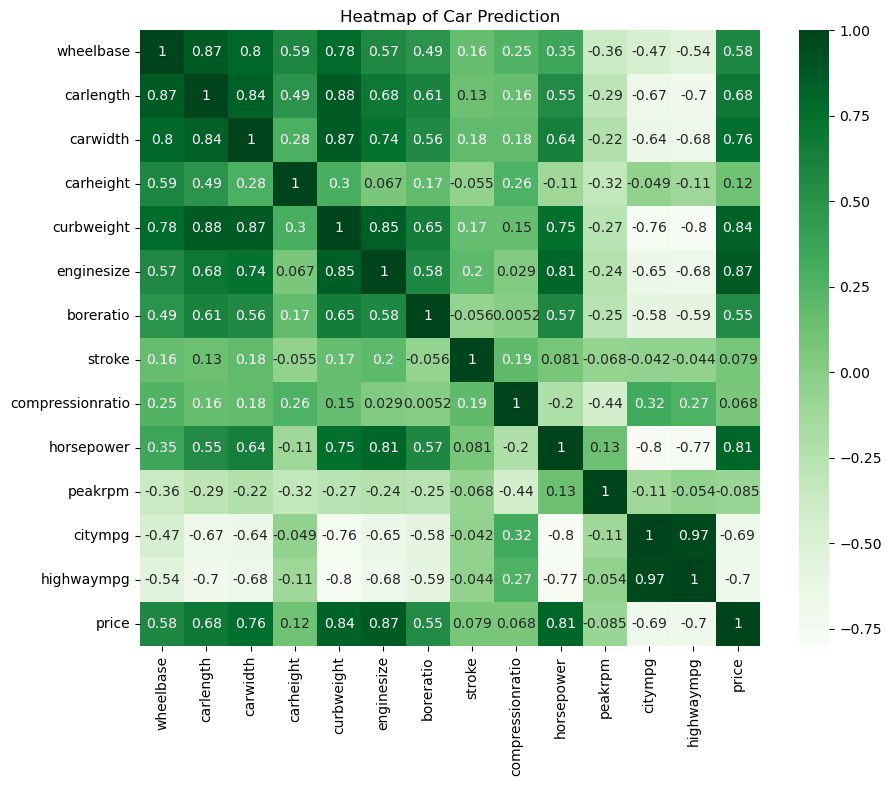

In [238]:
plt.figure(figsize=(10,8))
sns.heatmap(x,cmap="Greens",annot=True)
plt.title("Heatmap of Car Prediction")
plt.show()

## Bivariate Analysis (Numerical and Categorical Variable)

<Axes: title={'center': 'enginesize'}, xlabel='carbody'>

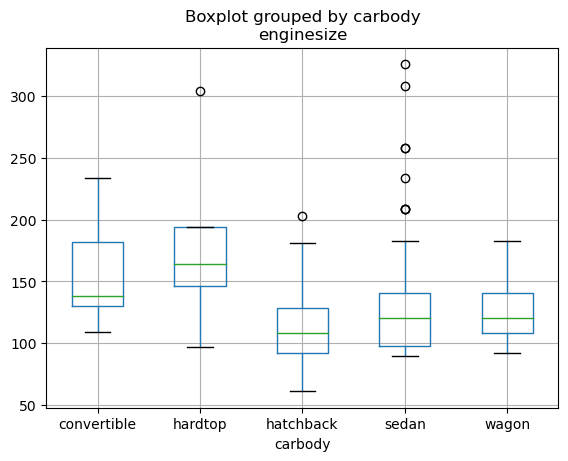

In [239]:
#Here I tried to draw the conclusion between engine size and carbody.
#Most of the outliers with respect to engine size are under the Sedan

cars.boxplot(column="enginesize", by="carbody")

<Axes: title={'center': 'wheelbase'}, xlabel='carbody'>

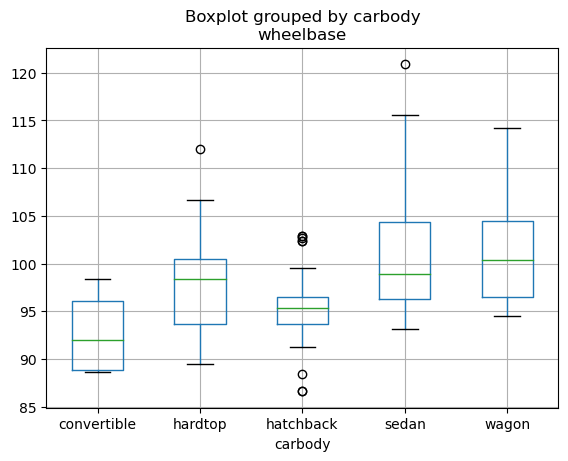

In [240]:
cars.boxplot(column="wheelbase", by="carbody")

# Data Cleaning:

In [241]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [242]:
#Checking the duplicates in the data
cars.duplicated().sum()

0

In [243]:
#Finding the null values in the data
cars.isnull().sum()

#Conclusion: No null values found in any of the row.

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Multivariate Analysis:

In [244]:
cars['CarName']

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [245]:
#Extracting numerical data from the car name

carnames = cars['CarName'].apply(lambda x: x.split(" ")[0])
carnames[:205]

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [246]:
#Checking whether all the numericals are removed from the carnames or not
carnames.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [247]:
import re

# regex: any alphanumeric sequence before a space, may contain a hyphen
p = re.compile(r'\w+-?\w+')
carnames = cars['CarName'].apply(lambda x: re.findall(p, x)[0])
print(carnames)

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object


In [248]:
cars['car_company'] = cars['CarName'].apply(lambda x: re.findall(p, x)[0])

In [249]:
cars["car_company"].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

In [250]:
cars.describe().columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [251]:
# Finding skew before and after to compare the shape after treatment 
# We can use SD, IQR, SKEW etc

from scipy import stats
for X in cars.describe().columns:
    print('The skewness and Max_Z-Score value for {} is {} and {} respectively'.format(X,cars[X].skew(),np.max(abs(stats.zscore(cars[X])))))

The skewness and Max_Z-Score value for car_ID is 0.0 and 1.7236222864675912 respectively
The skewness and Max_Z-Score value for symboling is 0.21107227205788776 and 2.2814331556403267 respectively
The skewness and Max_Z-Score value for wheelbase is 1.0502137758714858 and 3.6862252135740365 respectively
The skewness and Max_Z-Score value for carlength is 0.1559537713215604 and 2.766741434550069 respectively
The skewness and Max_Z-Score value for carwidth is 0.904003498786254 and 2.98705556854827 respectively
The skewness and Max_Z-Score value for carheight is 0.06312273247192804 and 2.492301615471819 respectively
The skewness and Max_Z-Score value for curbweight is 0.681398189052588 and 2.9079877723438705 respectively
The skewness and Max_Z-Score value for enginesize is 1.9476550452788108 and 4.7926789111561625 respectively
The skewness and Max_Z-Score value for boreratio is 0.02015641810424137 and 2.9230489468762504 respectively
The skewness and Max_Z-Score value for stroke is -0.68970

In [252]:
cars['enginesize'].quantile([0.05, 0.25, 0.5, 0.9,0.95,0.96,0.97,0.98,0.99,1.0])

0.05     90.00
0.25     97.00
0.50    120.00
0.90    181.00
0.95    201.20
0.96    209.00
0.97    231.00
0.98    256.08
0.99    302.16
1.00    326.00
Name: enginesize, dtype: float64

In [253]:
cars['price'].quantile([0.05, 0.25, 0.5, 0.9,0.95,0.96,0.97,0.98,0.99,1.0])

0.05     6197.00
0.25     7788.00
0.50    10295.00
0.90    22563.00
0.95    32472.40
0.96    34159.04
0.97    35490.72
0.98    36809.60
0.99    40802.72
1.00    45400.00
Name: price, dtype: float64

# Outiler Treatment:

In [254]:
col_sel=['compressionratio','enginesize','carwidth','wheelbase']
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))


iqr_capping(cars, col_sel, 1.5)

Now that we have done outlier treatment the skewness and Z-score value would have got changed so re-run the code

In [255]:
for X in cars.describe().columns:
    print('The skewness and Max_Z-Score value for {} is {} and {} respectively'.format(X,cars[X].skew(),np.max(abs(stats.zscore(cars[X])))))

The skewness and Max_Z-Score value for car_ID is 0.0 and 1.7236222864675912 respectively
The skewness and Max_Z-Score value for symboling is 0.21107227205788776 and 2.2814331556403267 respectively
The skewness and Max_Z-Score value for wheelbase is 0.9249160965378501 and 2.647995925478819 respectively
The skewness and Max_Z-Score value for carlength is 0.1559537713215604 and 2.766741434550069 respectively
The skewness and Max_Z-Score value for carwidth is 0.7762776833615744 and 2.6873523757623885 respectively
The skewness and Max_Z-Score value for carheight is 0.06312273247192804 and 2.492301615471819 respectively
The skewness and Max_Z-Score value for curbweight is 0.681398189052588 and 2.9079877723438705 respectively
The skewness and Max_Z-Score value for enginesize is 0.9084533133862073 and 2.432160443144792 respectively
The skewness and Max_Z-Score value for boreratio is 0.02015641810424137 and 2.9230489468762504 respectively
The skewness and Max_Z-Score value for stroke is -0.6897

# Data Preparation

Splitting the data into features and Target Variable. Our main target is to find the price that's why it becomes target variable.

In [256]:
X = cars.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'car_company']]

y  = cars['price']

In [257]:
# creating dummy variables for categorical variables

# subset all categorical variables
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()


,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [258]:
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_toyouta,car_company_vokswagen,car_company_volkswagen,car_company_volvo,car_company_vw
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [274]:
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_toyouta,car_company_vokswagen,car_company_volkswagen,car_company_volvo,car_company_vw
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [259]:
# drop categorical variables 
X = X.drop(list(cars_categorical.columns), axis=1)

In [260]:
# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)

In [261]:
X.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_alfa-romero',
       'car_company_audi', 'car_company_bmw', 'car_company_buick',
       'car_company_chevrolet', 'car_company_dodge', 'car_company_ho

# Multi collinearity:

In [263]:
Default_independent=X

import statsmodels.api as sm
features=list(Default_independent.columns)
for i in range(1, len(Default_independent.columns)):
    x=Default_indep.loc[:,Default_independent.columns!=features[i]]
    y=Default_indep.loc[:,Default_independent.columns==features[i]]
    model=sm.OLS(y,x)
    results=model.fit()

    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print ("R-Square value of {} is {}".format(features[i],rsq))
    print ('VIF for {} is {}'.format(features[i],vif))

R-Square value of wheelbase is 0.955941073726567
VIF for wheelbase is 22.7
R-Square value of carlength is 0.9600989097494776
VIF for carlength is 25.06
R-Square value of carwidth is 0.9379569998669111
VIF for carwidth is 16.12
R-Square value of carheight is 0.8787619748185758
VIF for carheight is 8.25
R-Square value of curbweight is 0.9816958702024747
VIF for curbweight is 54.63
R-Square value of enginesize is 0.98421159354105
VIF for enginesize is 63.34
R-Square value of boreratio is 0.9364634782184693
VIF for boreratio is 15.74
R-Square value of stroke is 0.8548554400713568
VIF for stroke is 6.89
R-Square value of compressionratio is 0.9099257967339182
VIF for compressionratio is 11.1
R-Square value of horsepower is 0.9823649396827956
VIF for horsepower is 56.71
R-Square value of peakrpm is 0.8470274486526912
VIF for peakrpm is 6.54
R-Square value of citympg is 0.9826358631582444
VIF for citympg is 57.59
R-Square value of highwaympg is 0.97893806466836
VIF for highwaympg is 47.48
R-S

C:\Users\Sumanth_Kavety\AppData\Local\Temp\ipykernel_22396\1115403334.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  vif=round(1/(1-rsq),2)


Splitting the data into test and train by using Linear model:

In [266]:
print(X), print(y)
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=1)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0            3       88.6      168.8      64.1       48.8        2548   
1            3       88.6      168.8      64.1       48.8        2548   
2            1       94.5      171.2      65.5       52.4        2823   
3            2       99.8      176.6      66.2       54.3        2337   
4            2       99.4      176.6      66.4       54.3        2824   
..         ...        ...        ...       ...        ...         ...   
200         -1      109.1      188.8      68.9       55.5        2952   
201         -1      109.1      188.8      68.8       55.5        3049   
202         -1      109.1      188.8      68.9       55.5        3012   
203         -1      109.1      188.8      68.9       55.5        3217   
204         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  stroke  compressionratio  ...  \
0         130.0       3.47    2.68               9.0  ...   
1

## Model building and evaluation:

In [269]:
import sklearn

In [270]:
#Fitting a Linear Regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)
print(lm.coef_)

[[ 6.11464689e-16 -1.41916643e-15  3.63749829e-16  3.76825307e-15
   8.75167994e-16 -1.12757026e-17 -8.32667268e-17  5.27702881e-15
  -9.13158438e-15 -3.47118168e-15  5.55111512e-17 -4.11996826e-18
   4.35415592e-16  2.05564732e-16 -6.04117451e-15 -2.25730892e-15
  -2.37657116e-15 -3.95083272e-16  4.04190570e-15  6.42715048e-15
   7.15790274e-15 -5.02852968e-15 -7.70217223e-16 -2.36854807e-15
  -1.81785603e-14 -2.03483064e-15  3.22138149e-15 -7.82360288e-16
  -6.50521303e-16  2.10096697e-15 -8.90953977e-15 -5.63752604e-15
  -3.84067778e-15 -2.01227923e-16 -9.02771781e-15  1.63627792e-15
   8.51575754e-15  1.53913340e-15  5.25707949e-15 -5.55111512e-17
   8.18138959e-15  7.40488400e-15  1.26622888e-14  3.64638875e-15
   3.24133081e-15 -8.35919875e-16  4.70869004e-16 -1.16755699e-15
   3.86322918e-15  1.09721260e-14  4.39166932e-15  8.99757699e-15
  -1.40200893e-17 -3.82701683e-15 -6.85118195e-15  5.74605467e-15
   5.10485751e-15 -5.41233725e-16 -1.21810114e-16 -4.18767668e-15
   5.59188

In [273]:
Coef_df=pd.DataFrame(zip(x_train.columns,lm.coef_))
Coef_df.transpose()

,0
0,symboling
1,"[6.114646892395489e-16, -1.419166433674901e-15..."


In [275]:
#Printing the coefficients (m) and Intercepts (c)
print(lm.coef_)
print(lm.intercept_)

[[ 6.11464689e-16 -1.41916643e-15  3.63749829e-16  3.76825307e-15
   8.75167994e-16 -1.12757026e-17 -8.32667268e-17  5.27702881e-15
  -9.13158438e-15 -3.47118168e-15  5.55111512e-17 -4.11996826e-18
   4.35415592e-16  2.05564732e-16 -6.04117451e-15 -2.25730892e-15
  -2.37657116e-15 -3.95083272e-16  4.04190570e-15  6.42715048e-15
   7.15790274e-15 -5.02852968e-15 -7.70217223e-16 -2.36854807e-15
  -1.81785603e-14 -2.03483064e-15  3.22138149e-15 -7.82360288e-16
  -6.50521303e-16  2.10096697e-15 -8.90953977e-15 -5.63752604e-15
  -3.84067778e-15 -2.01227923e-16 -9.02771781e-15  1.63627792e-15
   8.51575754e-15  1.53913340e-15  5.25707949e-15 -5.55111512e-17
   8.18138959e-15  7.40488400e-15  1.26622888e-14  3.64638875e-15
   3.24133081e-15 -8.35919875e-16  4.70869004e-16 -1.16755699e-15
   3.86322918e-15  1.09721260e-14  4.39166932e-15  8.99757699e-15
  -1.40200893e-17 -3.82701683e-15 -6.85118195e-15  5.74605467e-15
   5.10485751e-15 -5.41233725e-16 -1.21810114e-16 -4.18767668e-15
   5.59188

In [278]:
#Getting the model tested on training data and accuracy of the trained model

y_train_pred=lm.predict(x_train)

from sklearn import metrics

mean_l1_error_train=metrics.mean_absolute_error(y_train,y_train_pred)
mean_l2_error_train=metrics.mean_squared_error(y_train,y_train_pred)
Rootmean_l2_error_train=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))

train_accuracy = lm.score(x_train, y_train)
print("mean_l1_error_train is {} mean_l2_error_train is {} Rootmean_l2_error_train is {} and accuracy is {}".format(mean_l1_error_train,mean_l2_error_train,Rootmean_l2_error_train,train_accuracy))

mean_l1_error_train is 5.36922862215236e-15 mean_l2_error_train is 4.282958476148448e-29 Rootmean_l2_error_train is 6.544431584292442e-15 and accuracy is 1.0


In [279]:
#Annova test
import statsmodels.api as sm

x_train_final=sm.add_constant(x_train)
model_object=sm.OLS(y_train,x_train_final)
model=model_object.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         car_company_vw   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.294e+24
Date:                Mon, 18 Sep 2023   Prob (F-statistic):               0.00
Time:                        06:05:01   Log-Likelihood:                 4529.1
No. Observations:                 153   AIC:                            -8932.
Df Residuals:                      90   BIC:                            -8741.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -4

In [280]:
DF_y_train_pred=pd.DataFrame(y_train_pred,columns=['price_predict'])
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
DF_y_train_pred.reset_index(drop=True, inplace=True)

Train_with_pred=pd.concat([x_train,y_train,DF_y_train_pred], axis=1)
Train_with_pred

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,car_company_saab,car_company_subaru,car_company_toyota,car_company_toyouta,car_company_vokswagen,car_company_volkswagen,car_company_volvo,car_company_vw,car_company_vw,price_predict
0,1,103.5,189.0,66.9,55.7,3055,164.0,3.31,3.19,9.0,...,0,0,0,0,0,0,0,0,0,2.188145e-15
1,0,95.7,166.3,64.4,52.8,2140,98.0,3.19,3.03,9.0,...,0,0,1,0,0,0,0,0,0,4.463369e-15
2,1,98.8,177.8,66.5,53.7,2385,122.0,3.39,3.39,8.6,...,0,0,0,0,0,0,0,0,0,-1.179321e-15
3,1,94.5,155.9,63.6,52.0,1874,90.0,3.03,3.11,9.6,...,0,0,0,0,0,0,0,0,0,-2.949873e-15
4,-1,102.4,175.6,66.5,53.9,2458,122.0,3.31,3.54,8.7,...,0,0,1,0,0,0,0,0,0,-1.837138e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2,99.1,186.6,66.5,56.1,2695,121.0,3.54,3.07,9.3,...,1,0,0,0,0,0,0,0,0,3.555281e-15
149,2,99.1,186.6,66.5,56.1,2847,121.0,3.54,3.07,9.0,...,1,0,0,0,0,0,0,0,0,-2.132357e-15
150,3,96.6,180.3,70.5,50.8,3685,207.0,3.46,3.10,8.3,...,0,0,0,0,0,0,0,0,0,1.793771e-15
151,2,93.3,157.3,63.8,55.7,2240,108.0,3.62,2.64,8.7,...,0,1,0,0,0,0,0,0,0,8.644015e-15


In [281]:
#Getting the model tested on testing data and accuracy of the testing model

y_test_pred=lm.predict(x_test)

from sklearn import metrics

mean_l1_error_test=metrics.mean_absolute_error(y_test,y_test_pred)
mean_l2_error_test=metrics.mean_squared_error(y_test,y_test_pred)
Rootmean_l2_error_test=round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),10)
test_accuracy = lm.score(x_test, y_test)
print(pd.DataFrame(zip(x_test,y_test,y_test_pred)))
print("mean_l1_error_test is {} mean_l2_error_test is {} Rootmean_l2_error_test is {} and rmse_test is {}".format(mean_l1_error_test,mean_l2_error_test,Rootmean_l2_error_test,test_accuracy))

           0               1                        2
0  symboling  car_company_vw  [1.234884875835145e-15]
mean_l1_error_test is 5.9944325445324005e-15 mean_l2_error_test is 5.23758047045731e-29 Rootmean_l2_error_test is 0.0 and rmse_test is 1.0


In [282]:
DF_y_test_pred=pd.DataFrame(y_test_pred,columns=['price_predict'])
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
DF_y_test_pred.reset_index(drop=True, inplace=True)

Test_with_pred=pd.concat([x_test,y_test,DF_y_test_pred], axis=1)
Test_with_pred

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,car_company_saab,car_company_subaru,car_company_toyota,car_company_toyouta,car_company_vokswagen,car_company_volkswagen,car_company_volvo,car_company_vw,car_company_vw,price_predict
0,2,93.70,157.3,64.4,50.8,2004,92.0,2.97,3.230,9.4,...,0,0,0,0,0,0,0,0,0,1.234885e-15
1,1,94.50,170.2,63.8,53.5,2037,97.0,3.15,3.290,9.4,...,0,0,0,0,0,0,0,0,0,9.833308e-15
2,1,95.70,158.7,63.6,54.5,2040,92.0,3.05,3.030,9.0,...,0,0,1,0,0,0,0,0,0,-1.405495e-15
3,1,94.50,155.9,63.6,52.0,1874,90.0,3.03,3.110,9.6,...,0,0,0,0,0,0,0,0,0,4.994598e-15
4,0,96.50,175.4,62.5,54.1,2372,110.0,3.15,3.580,9.0,...,0,0,0,0,0,0,0,0,0,-9.689587e-15
5,-1,110.00,190.9,70.3,56.5,3515,183.0,3.58,3.640,10.6,...,0,0,0,0,0,0,0,0,0,-1.139590e-14
6,2,95.10,162.4,63.8,53.3,2008,97.0,3.15,3.290,9.4,...,0,0,0,0,0,0,0,0,0,-3.021571e-15
7,2,88.40,141.1,60.3,53.2,1488,61.0,2.91,3.030,9.5,...,0,0,0,0,0,0,0,0,0,2.930752e-15
8,1,95.70,158.7,63.6,54.5,2015,92.0,3.05,3.030,9.0,...,0,0,1,0,0,0,0,0,0,1.252969e-15
9,0,98.80,177.8,66.5,55.5,2410,122.0,3.39,3.390,8.6,...,0,0,0,0,0,0,0,0,0,4.264440e-15
